**Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import os  
import matplotlib.pyplot as plt

**Merging 12 months sale data**

- create empty dataframe
- read all the data files
- concatinate with the empty dataframe

In [2]:
df = pd.read_csv('./Sales_Data/Sales_March_2019.csv')
files = [file for file in os.listdir('./Sales_Data')]

yearly_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    yearly_data = pd.concat([yearly_data, df])

for col_names in yearly_data.columns:
    yearly_data = yearly_data.applymap(lambda x : np.nan if x == col_names else x)

# yearly_data.head()
yearly_data.to_csv('Yearly_data.csv', index = False)

**Upload and Read updated dataset**

In [3]:
data = pd.read_csv('Yearly_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Checking and Handling Null Values**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(3), object(3)
memory usage: 8.6+ MB


**each column has only 0.29% null values so its better to drop them**

In [5]:
(data.isnull().sum()/data.shape[0])*100

Order ID            0.48167
Product             0.48167
Quantity Ordered    0.48167
Price Each          0.48167
Order Date          0.48167
Purchase Address    0.48167
dtype: float64

In [6]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Exercise

**In this data analysis project, I am going to analyze the data to answer the following questions for the client.**

- What was the best month for sales, and how much was earned in that month?
- Which city has the highest number of sales?
- What time should we display advertisements to maximize the likelihood of customers buying products?
- What products are most often sold together?
- What is the most sold product?

**Que1 - What was the best month for sales, and how much was earned in that month?**

In [8]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
data['Price Each'].astype(float)
data['Quantity Ordered'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(3), object(3)
memory usage: 8.5+ MB


In [10]:
data['Month'] = data['Order Date'].str[0:2].astype(int)

In [11]:
data['Total_Sale'] = data['Quantity Ordered'] * data['Price Each']

In [12]:
result = data.groupby('Month').sum()['Total_Sale']
result

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total_Sale, dtype: float64

**Result for challenge 1** - In December client has been made highest sale of 4613443.34

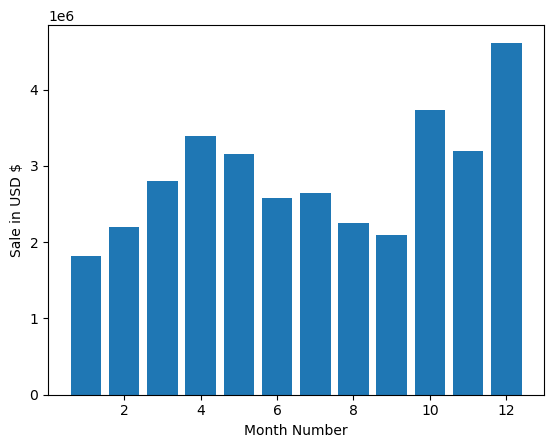

In [13]:
# Visualization of the question 1
plt.bar(range(1,13), result)
plt.xlabel('Month Number')
plt.ylabel('Sale in USD $')
plt.show()

**Que2 - Which city has the highest number of sales?**

In [14]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sale
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [15]:
# data['City'] = [j[1:] for i,j in enumerate(data['Purchase Address'].str.split(','))]
# or
data['City'] = data['Purchase Address'].apply(lambda i : i.split(',')[1])
data['State'] = data['Purchase Address'].apply(lambda i : i.split(',')[2].split(' ')[1])

In [16]:
data['City_Address'] = data['City'] + ' ' + data ['State']

In [17]:
data.drop(columns=['City', 'State'], inplace=True)

In [18]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sale,City_Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [19]:
result_city = data.groupby('City_Address').sum()['Total_Sale']
result_city

City_Address
 Atlanta GA          2795498.58
 Austin TX           1819581.75
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262203.91
 Seattle WA          2747755.48
Name: Total_Sale, dtype: float64

**Result -** San Francisco is a city with highest sale with 82622023.91 USD

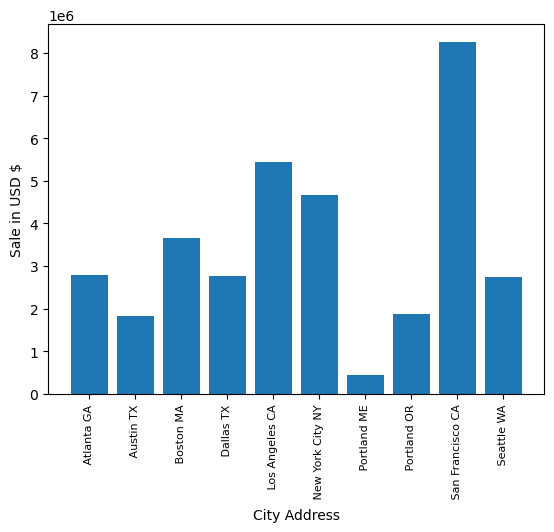

In [20]:
city = [city for city, _ in  data.groupby('City_Address')]
plt.bar(city, result_city)
plt.xticks(city, rotation = 'vertical', size = 8)
plt.xlabel('City Address')
plt.ylabel('Sale in USD $')
plt.show()

**Que3 - What time should we display advertisements to maximize the likelihood of customers buying products?**

In [21]:
data['Order_time'] = [j[1] for i,j in enumerate(data['Order Date'].str.split(' '))]
data['Hour'] = [j[0] for i,j in enumerate(data['Order_time'].str.split(':'))]

In [22]:
data['Hour'] = data['Hour'].astype(int)

In [23]:
result_hour = data.groupby('Hour').count()['Order ID']
result_hour

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

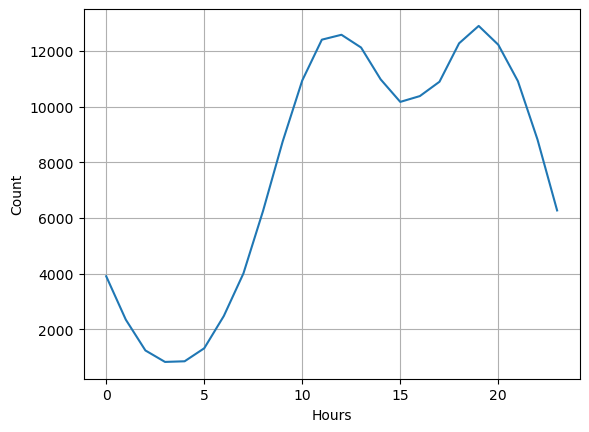

In [24]:
hour = [hour for hour, _ in data.groupby('Hour')]
plt.plot(hour,result_hour)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.grid()
plt.show()

**Result:** The best selling hours are between 11 AM to 1 PM and 6 PM to 8 PM.

**Que4 - What products are most often sold together?**

In [25]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sale,City_Address,Order_time,Hour
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,08:46,8
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22:30,22
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14:38,14
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14:38,14
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,09:27,9


In [26]:
data_new = data[data['Order ID'].duplicated(keep = False)]
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sale,City_Address,Order_time,Hour
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14:38,14
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14:38,14
17,176574.0,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19:42,19
18,176574.0,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19:42,19
29,176585.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11:31,11


In [27]:
data_new['grouped'] = data_new.groupby('Order ID')['Product'].transform(lambda i: ','.join(i))

C:\Users\Sk\AppData\Local\Temp\ipykernel_20552\1292156746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['grouped'] = data_new.groupby('Order ID')['Product'].transform(lambda i: ','.join(i))


In [28]:
data_new = data_new.drop_duplicates(subset=['Order ID'])
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sale,City_Address,Order_time,Hour,grouped
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14:38,14,"Google Phone,Wired Headphones"
17,176574.0,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19:42,19,"Google Phone,USB-C Charging Cable"
29,176585.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11:31,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586.0,AAA Batteries (4-pack),2.0,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17:00,17,"AAA Batteries (4-pack),Google Phone"
118,176672.0,Lightning Charging Cable,1.0,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11:07,11,"Lightning Charging Cable,USB-C Charging Cable"


In [29]:
combined_items = data_new['grouped'].value_counts()[:1]
combined_items

grouped
iPhone,Lightning Charging Cable    882
Name: count, dtype: int64

**Result:** The product combination that is most commonly sold together is the iPhone with a Lightning Charging Cable.

**Que5 - What is the most sold product?**

In [30]:
most_sold_product = data.groupby('Product').sum()['Quantity Ordered']
most_sold_product

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

**Result:** The most sold product is the USB-C charging cable.

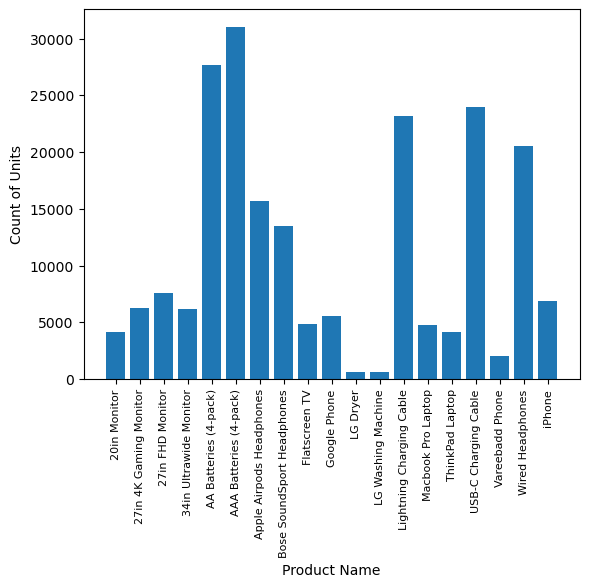

In [31]:
product = [product for product, _ in  data.groupby('Product')]
plt.bar(product, most_sold_product)
plt.xticks(product, rotation = 'vertical', size = 8)
plt.xlabel('Product Name')
plt.ylabel('Count of Units')
plt.show()

In [ ]:
# Pandas Data Analysis for 12 months of sales dataset
Set of real world data science tasks completed using the Python Pandas library.


## Overview of the project:

The points which I have learnt and understood during the project
- Drop NaN values from DataFrame
- Removing rows based on a condition
- Change the type of columns (to_numeric, to_datetime, astype)

Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

To answer these questions we walk through many different pandas & matplotlib methods. They include:
- Concatenating multiple csvs together to create a new DataFrame (pd.concat)
- Adding columns
- Parsing cells as strings to make new columns (.str)
- Using the .apply() method
- Using groupby to perform aggregate analysis
- Plotting bar charts and lines graphs to visualize our results
- Labeling our graphs